In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

predf = pd.read_csv('/content/drive/MyDrive/Inteligencia artificial/Bitcoin/df_final.csv')

In [4]:
list(predf) 

['Unnamed: 0',
 'Close',
 'Volume',
 'NumberTransactions',
 'Close SP500',
 'halving',
 'Close Gold',
 'Close_eth',
 'MA_2',
 'EMA_2',
 'MA_3',
 'EMA_3',
 'MA_5',
 'EMA_5',
 'MA_8',
 'EMA_8',
 'MA_9',
 'EMA_9',
 'MA_10',
 'EMA_10',
 'MA_15',
 'EMA_15',
 'Momentum_15',
 'MA_21',
 'EMA_21',
 'Momentum_21',
 'MA_105',
 'EMA_105',
 'Momentum_105',
 'BollingerB_105',
 'MA_200',
 'EMA_200',
 'Momentum_200',
 'BollingerB_200',
 'MA_300',
 'EMA_300',
 'Momentum_300',
 'BollingerB_300',
 'PIB',
 'CPI',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear',
 'MA_EMA_PCA',
 'Momentum_PCA',
 'Bollinger_PCA',
 'tipoint']

In [5]:
df = predf.drop(['MA_2','EMA_2','MA_3','EMA_3','MA_5','EMA_5','MA_8','EMA_8','MA_9','EMA_9','MA_10','EMA_10','MA_15','EMA_15','Momentum_15','MA_21','EMA_21','Momentum_21','MA_105','EMA_105','Momentum_105','BollingerB_105','MA_200','EMA_200','Momentum_200','BollingerB_200','MA_300','EMA_300','Momentum_300','BollingerB_300'], axis=1)

In [6]:
df = df.drop(['Unnamed: 0'],axis =1)

In [7]:
df

,Close,Volume,NumberTransactions,Close SP500,halving,Close Gold,Close_eth,PIB,CPI,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA_EMA_PCA,Momentum_PCA,Bollinger_PCA,tipoint
0,247.60,9493.890000,134410,2052.23,1,1130.3,0.63,54420.0,-0.044968,0,4,10,2015,285,12,42,-3.881665,-0.672592,-2.648255,0.75
1,250.00,12875.400000,134878,2003.69,1,1231.7,0.60,54420.0,-0.044968,1,4,10,2015,286,13,42,-3.871739,-0.672592,-2.648255,0.75
2,253.00,30115.770000,141985,1994.24,1,1243.6,0.50,54420.0,-0.044968,2,4,10,2015,287,14,42,-3.861714,-0.672592,-2.648255,0.75
3,255.26,50535.450000,153495,2023.86,1,1251.4,0.56,54420.0,-0.044968,3,4,10,2015,288,15,42,-3.861548,-0.672592,-2.648255,0.75
4,263.75,26743.350000,143286,2033.11,1,1246.6,0.53,54420.0,-0.044968,4,4,10,2015,289,16,42,-3.851186,-0.672592,-2.648255,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,61334.80,91764.139884,2639940,4185.47,3,1779.0,2422.67,56812.0,0.547438,4,2,4,2021,106,16,15,23.539785,9.283724,2.316086,0.25
2014,60006.66,58912.256128,2268816,4185.47,3,1779.0,2317.60,56812.0,0.547438,5,2,4,2021,107,17,15,23.571405,7.805109,2.289489,0.25
2015,56150.01,124882.131824,3444089,4185.47,3,1779.0,2235.64,56812.0,0.547438,6,2,4,2021,108,18,15,23.519828,6.822815,2.264547,0.25
2016,55633.14,78229.042267,2390527,4162.80,3,1769.4,2161.12,56812.0,0.547438,0,2,4,2021,109,19,16,23.193382,5.218424,2.233535,0.25


# XGBoost

In [8]:
X = df.iloc[:, 1:20]
y = df.iloc[:, [0]]

In [ ]:
#scaler = MinMaxScaler()
#scaled = scaler.fit_transform(X)

In [ ]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[14:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

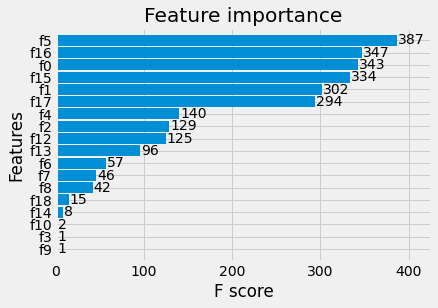

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

,validacion
0,54280.800781
1,51738.238281
2,45256.605469
3,42870.953125
4,42811.761719
5,41173.019531
6,41356.730469
7,41058.707031
8,40819.609375
9,42073.175781


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

56286799.45681238

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

7101.290317796611

In [ ]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index()
y_test = y_test.drop(['index'],axis=1)

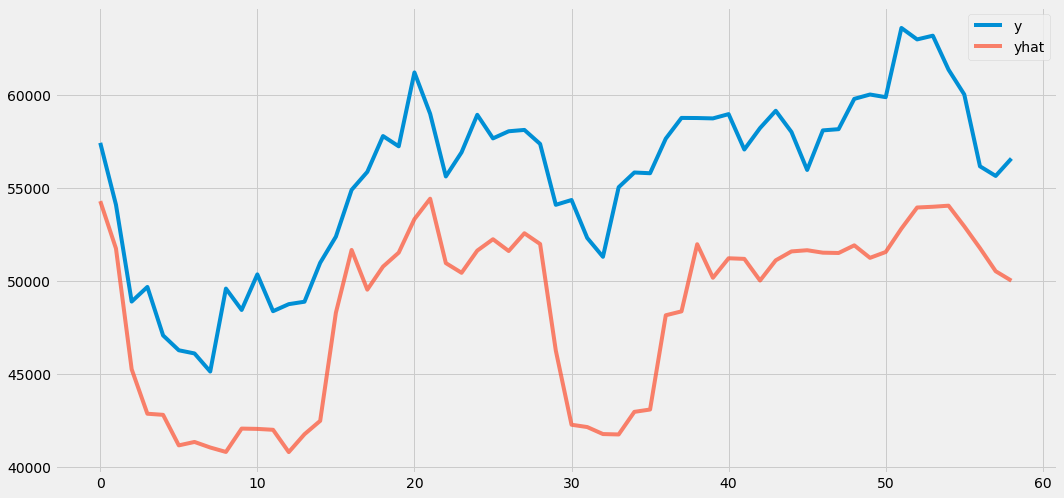

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_test, label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
y_test

,Close
0,57408.57
1,54087.67
2,48891.00
3,49676.20
4,47073.73
5,46276.87
6,46106.43
7,45135.66
8,49587.03
9,48440.65


In [ ]:
validacion_p

,validacion
0,54280.800781
1,51738.238281
2,45256.605469
3,42870.953125
4,42811.761719
5,41173.019531
6,41356.730469
7,41058.707031
8,40819.609375
9,42073.175781


In [ ]:
err = 0
y_array = y_test.Close.values
y_val = validacion_p.validacion.values
for i in range(0,len(y_array)-1):
  if y_array[i]> y_array[i+1]:
    if y_val[i]<y_val[i+1]:
      err+=1

  else: 
    if y_val[i]>y_val[i+1]:
      err+=1
#1-(err/len(y_array))

In [ ]:
1-(err/len(y_array))

0.5593220338983051

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
list(df)

['Close',
 'Volume',
 'NumberTransactions',
 'Close SP500',
 'halving',
 'Close Gold',
 'Close_eth',
 'PIB',
 'CPI',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear',
 'MA_EMA_PCA',
 'Momentum_PCA',
 'Bollinger_PCA',
 'tipoint']

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[14:06:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44298.9
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:34899.1
[2]	Test-rmse:27512.8
[3]	Test-rmse:23639.1
[4]	Test-rmse:20001.6
[5]	Test-rmse:18427.1
[6]	Test-rmse:15633.9
[7]	Test-rmse:14127.9
[8]	Test-rmse:12650.3
[9]	Test-rmse:11743.3
[10]	Test-rmse:10510.5
[11]	Test-rmse:9530.56
[12]	Test-rmse:8751.94
[13]	Test-rmse:8319.83
[14]	Test-rmse:8190.59
[15]	Test-rmse:7789.62
[16]	Test-rmse:7663.24
[17]	Test-rmse:7561.78
[18]	Test-rmse:7523.19
[19]	Test-rmse:7492.86
[20]	Test-rmse:7468.63
[21]	Test-rmse:7462.58
[22]	Test-rmse:7445.82
[23]	Test-rmse:7424.24
[24]	Test-rmse:7389.46
[25]	Test-rmse:7361.89
[26]	Test-rmse:7359.38
[27]	Test-rmse:7354.71
[28]	Test-rmse:7349.47
[29]	Test-rmse:7345.37
[30]	Test-rmse:7338.17
[31]	Test-rmse:7314.8
[32]	Test-rmse:7312.86
[33]	Test-rmse:7311.37
[34]	Test-rmse:7312.01
[35]	Test-rmse:7318.93

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 7304.40 with 39 rounds


In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[14:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,4737.324056,88.771360,4740.753581,182.072827
1,3344.263265,63.506393,3354.956299,134.062496
2,2363.513265,45.328453,2380.765218,104.541984
3,1671.437907,31.716750,1682.113403,79.662835
4,1183.313192,23.365197,1194.445882,57.089372
...,...,...,...,...
242,1.630306,0.154150,254.119273,15.654130
243,1.613907,0.163869,254.118057,15.654782
244,1.593833,0.163706,254.117849,15.654568
245,1.577206,0.178709,254.115901,15.656361


In [ ]:
cv_results['test-mae-mean'].min()

254.11137399999998

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[14:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 248.6010832 for 43 rounds


In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 248.6010832


In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[14:06:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 248.6010832 for 43 rounds
CV with subsample=1.0, colsample=0.9
[14:06:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06

In [ ]:
params['subsample'] = 0.9
params['colsample_bytree'] = 1.0

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[14:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 237.05651859999998 for 144 rounds

CV with eta=0.2
[14:07:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:32] WARNING: /workspace/src/obje

In [ ]:
params['eta'] = 0.05

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

{'colsample_bytree': 1.0,
 'eta': 0.05,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 0.9}

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[14:09:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:53625.9
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:51813.1
[2]	Test-mae:49904.3
[3]	Test-mae:48226.9
[4]	Test-mae:46491.2
[5]	Test-mae:45033.8
[6]	Test-mae:43310.1
[7]	Test-mae:41832.1
[8]	Test-mae:40358.2
[9]	Test-mae:39207.4
[10]	Test-mae:37883.9
[11]	Test-mae:36692.4
[12]	Test-mae:35481
[13]	Test-mae:34341.8
[14]	Test-mae:33246.5
[15]	Test-mae:32186
[16]	Test-mae:31341.2
[17]	Test-mae:30285.3
[18]	Test-mae:29545.2
[19]	Test-mae:28581.9
[20]	Test-mae:27896.4
[21]	Test-mae:27083.7
[22]	Test-mae:26315.2
[23]	Test-mae:25608.6
[24]	Test-mae:24998.8
[25]	Test-mae:24410.4
[26]	Test-mae:23755.2
[27]	Test-mae:23157.7
[28]	Test-mae:22562.8
[29]	Test-mae:22018
[30]	Test-mae:21512
[31]	Test-mae:21119.4
[32]	Test-mae:20733.2
[33]	Test-mae:20261.3
[34]	Test-mae:19915.1
[35]	Test-mae:19594.3
[36]	Test-mae:19257.8
[37]	Test-mae:18966.

In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
print(reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
import xgboost as xgb

In [ ]:
best_model_Users.attributes()

{'best_iteration': '241',
 'best_msg': '[241]\tTest-mae:9581.56',
 'best_score': '9581.5625'}

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

101700470.47193424

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

9693.517409957627

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

,index,Close
0,0,57408.57
1,1,54087.67
2,2,48891.00
3,3,49676.20
4,4,47073.73
5,5,46276.87
6,6,46106.43
7,7,45135.66
8,8,49587.03
9,9,48440.65


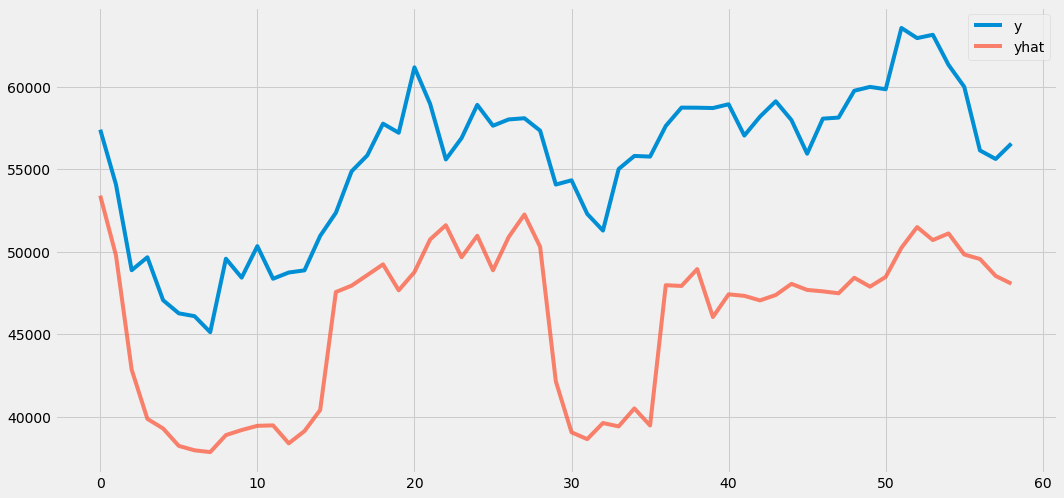

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

,validacion
0,251.685120
1,251.110641
2,251.495010
3,250.687775
4,261.053955
...,...
2013,51119.242188
2014,49842.992188
2015,49570.539062
2016,48544.433594


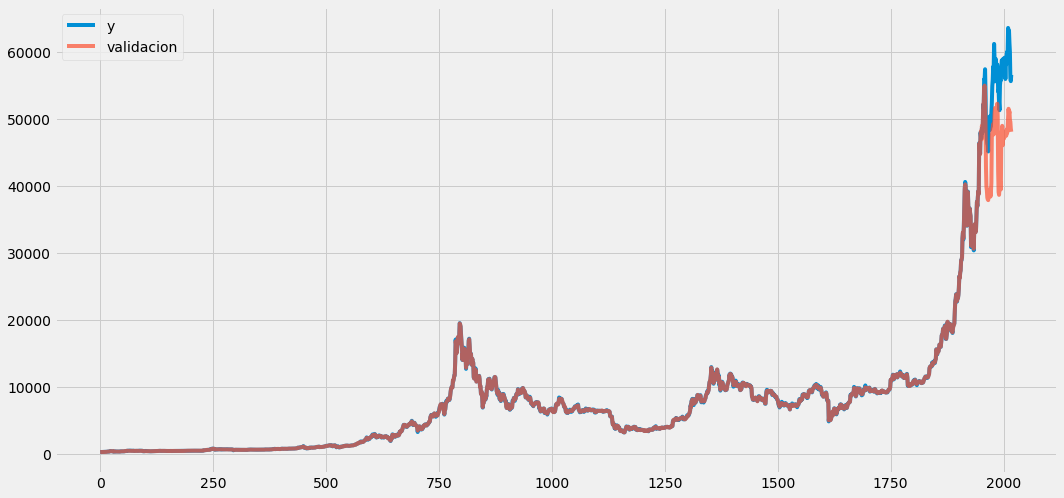

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

NameError: ignored

In [ ]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

NameError: ignored

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

NameError: ignored

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=df2.columns.values[1:48])

NameError: ignored

In [ ]:
X

,Volume,NumberTransactions,Close SP500,halving,Close Gold,Close_eth,PIB,CPI,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA_EMA_PCA,Momentum_PCA,Bollinger_PCA,tipoint
0,9493.890000,134410,2052.23,1,1130.3,0.63,54420.0,-0.044968,0,4,10,2015,285,12,42,-3.881665,-0.672592,-2.648255,0.75
1,12875.400000,134878,2003.69,1,1231.7,0.60,54420.0,-0.044968,1,4,10,2015,286,13,42,-3.871739,-0.672592,-2.648255,0.75
2,30115.770000,141985,1994.24,1,1243.6,0.50,54420.0,-0.044968,2,4,10,2015,287,14,42,-3.861714,-0.672592,-2.648255,0.75
3,50535.450000,153495,2023.86,1,1251.4,0.56,54420.0,-0.044968,3,4,10,2015,288,15,42,-3.861548,-0.672592,-2.648255,0.75
4,26743.350000,143286,2033.11,1,1246.6,0.53,54420.0,-0.044968,4,4,10,2015,289,16,42,-3.851186,-0.672592,-2.648255,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,91764.139884,2639940,4185.47,3,1779.0,2422.67,56812.0,0.547438,4,2,4,2021,106,16,15,23.539785,9.283724,2.316086,0.25
2014,58912.256128,2268816,4185.47,3,1779.0,2317.60,56812.0,0.547438,5,2,4,2021,107,17,15,23.571405,7.805109,2.289489,0.25
2015,124882.131824,3444089,4185.47,3,1779.0,2235.64,56812.0,0.547438,6,2,4,2021,108,18,15,23.519828,6.822815,2.264547,0.25
2016,78229.042267,2390527,4162.80,3,1769.4,2161.12,56812.0,0.547438,0,2,4,2021,109,19,16,23.193382,5.218424,2.233535,0.25


# Escalado de variables

In [15]:
from sklearn import preprocessing

In [16]:
# Escalado de la variable target
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)
# y = scaler.inverse_transform(y)

In [17]:
# Escalado 
scalerx = preprocessing.StandardScaler().fit(X)
x = scalerx.transform(X)

In [18]:
X_train = x[:1959]
y_train = y[:1959]
X_test = x[1959:]
y_test = y[1959:]

# Gaussian Regressor

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel as C
from pylab import figure

In [ ]:
#kernel = C(1.0, (0.1, 10.0)) * RBF([0.1], (1e-2, 1e2))
kernel = C(1.0, (0.1, 10.0)) + RBF([0.9], (1e-2, 1e2))

In [ ]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

In [ ]:
gaussian_regrassor = gp.fit(X_train,y_train)

In [ ]:
yhat3 = gaussian_regrassor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat3)
mse

1.592107437252971

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, yhat3)

1.2167808583755613

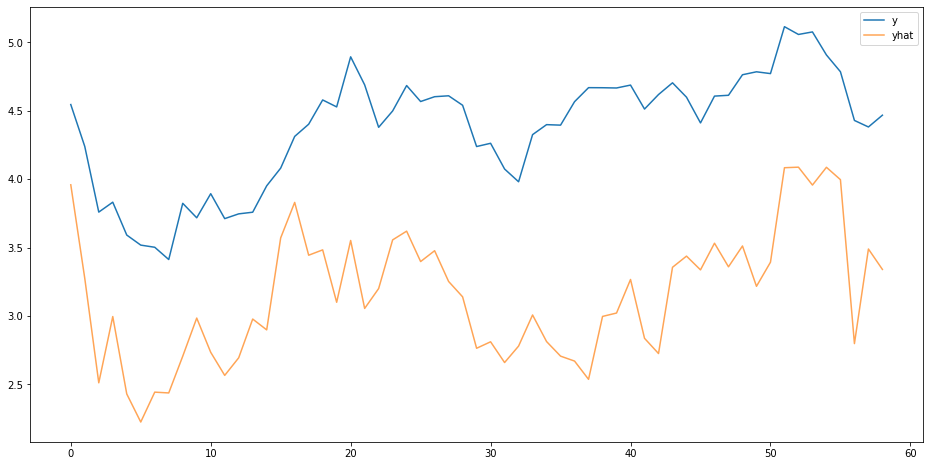

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_test, label='y')
plt.plot(yhat3, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
para_metaregresor = pd.DataFrame(yhat3)


In [18]:
def rmse(predictions, targets): 

  return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
rmse(yhat3,y_test)

1.2617873978024075

# XGBoost Gaussian processes Regression with GPy

In [13]:
!pip install GPy

     |████████████████████████████████| 1.0MB 3.8MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp37-cp37m-linux_x86_64.whl size=2626968 sha256=b8ee9af4a896256e3f01e8bb34c6791376a234c464d35efabde1f0c5acb3733b
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp37-none-any.whl size=102552 sha256=61725b72f5b95b25b5296a4b9ab3bd39a2b0838a58ad8b8df548bc98760596b4
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [14]:
!pip install GPyOpt

     |████████████████████████████████| 61kB 2.3MB/s 
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-cp37-none-any.whl size=83623 sha256=4f8e18b5e02558c007d5c070c55c1173e6b390e685e0c0522d5a51a19f198872
  Stored in directory: /root/.cache/pip/wheels/b2/00/69/cfa967a125cf25e66f644be6193ad6f0edf231147879ad714f
Successfully built GPyOpt


In [9]:
import GPy
import GPyOpt
import seaborn as sns
sigma_f, l = 1.5, 2
kernel = GPy.kern.RBF(1, sigma_f, l)

In [ ]:
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        XGBRegressor(learning_rate=parameters[0],
                     max_depth=int(parameters[2]),
                     n_estimators=int(parameters[3]),
                     gamma=int(parameters[1]),
                     min_child_weight = parameters[4]), 
        X_train, y_train, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

In [ ]:
bounds = [
    {'name': 'learning_rate',
     'type': 'continuous',
     'domain': (0, 1)},
    {'name': 'gamma',
     'type': 'continuous',
     'domain': (0, 5)},
    {'name': 'max_depth',
     'type': 'discrete',
     'domain': (1, 50)},
    {'name': 'n_estimators',
     'type': 'discrete',
     'domain': (1, 300)},
    {'name': 'min_child_weight',
     'type': 'discrete',
     'domain': (1, 10)}
]

In [10]:
from sklearn.model_selection import cross_val_score

In [ ]:

from xgboost import XGBRegressor
baseline = -cross_val_score(
    XGBRegressor(), X_train, y_train, scoring='neg_root_mean_squared_error'
).mean()
baseline

[17:13:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.2586920500868844

[17:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

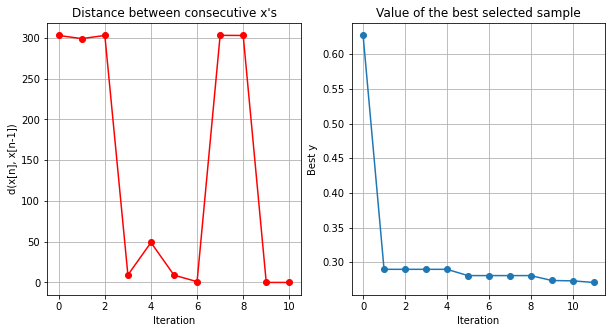

In [ ]:
optimizer = GPyOpt.methods.BayesianOptimization(
    f=f, domain=bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)
max_iter = 50
max_time = 60
optimizer.run_optimization(max_iter, max_time)
optimizer.plot_convergence()

In [ ]:
optimizer.X[np.argmin(optimizer.Y)]

array([  1.        ,   4.90334437,  50.        , 300.        ,
        10.        ])

In [ ]:
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)

RMSE: 0.2486580124056499 Gain: 104.03527623508285


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [ ]:
boost = xgb.XGBRegressor(learning_rate=1, max_depth=1, n_estimators=300, gamma=0, min_child_weight = 10)
boost.fit(X_train, y_train)

[17:18:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=1, min_child_weight=10, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
yhat_boost = boost.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat_boost)
mse

1.0735723014653042

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, yhat_boost)

0.9986499261415424

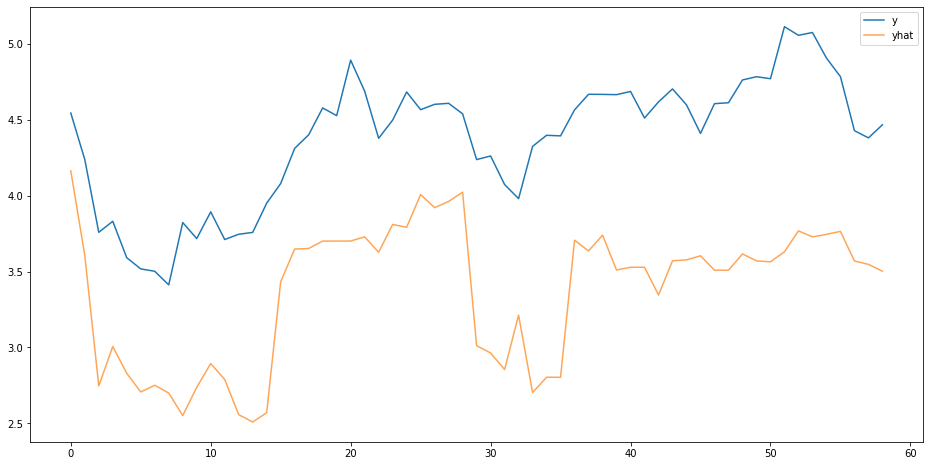

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_test, label='y')
plt.plot(yhat_boost, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
para_metaregresor['xgboost']=yhat_boost

# SVR

In [12]:
from sklearn.svm import SVR# Bounds (define continuous variables first, then discrete!)
bounds = [
    {'name': 'C',
     'type': 'continuous',
     'domain': (0.9, 1000)},    
     {'name': 'epsilon',
     'type': 'continuous',
     'domain': (0.5, 10)},    
     {'name': 'gamma',
     'type': 'continuous',
     'domain': (0.9, 10)}
]
 
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        SVR(kernel='linear',C = parameters[0],
            epsilon = parameters[1],
            gamma = parameters[2]), 
        X, y, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

In [ ]:

optimizer = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds,acquisition_type ='MPI',acquisition_par=0.1,exact_eval=True)
max_iter = 50*4
max_time = 60*4
optimizer.run_optimization(max_iter, max_time)
baseline = -cross_val_score(
    SVR(), X_train, y_train, scoring='neg_root_mean_squared_error'
).mean()
print(baseline)
# 70.44352670586173print(optimizer.X[np.argmin(optimizer.Y)])
# [126.64337652   8.49323372   8.59189135]print('RMSE:', np.min(optimizer.Y),
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)
# RMSE: 54.02576574389976 Gain: 130.38876124364006     best_epsilon = optimizer.X[np.argmin(optimizer.Y)][1] 
optimizer.plot_convergence()





In [ ]:
optimizer.X[np.argmin(optimizer.Y)]

array([3.43983766e+00, 1.00000000e-05, 3.32456400e+00])

In [42]:
svr_re = SVR(kernel='linear',C = 1,
    epsilon = 0.003,
    gamma = 1)

In [43]:
svr_re.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.003, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
yhat_svr = svr_re.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat_svr)
mse

0.07090185169562033

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, yhat_svr)

0.2119910002034477

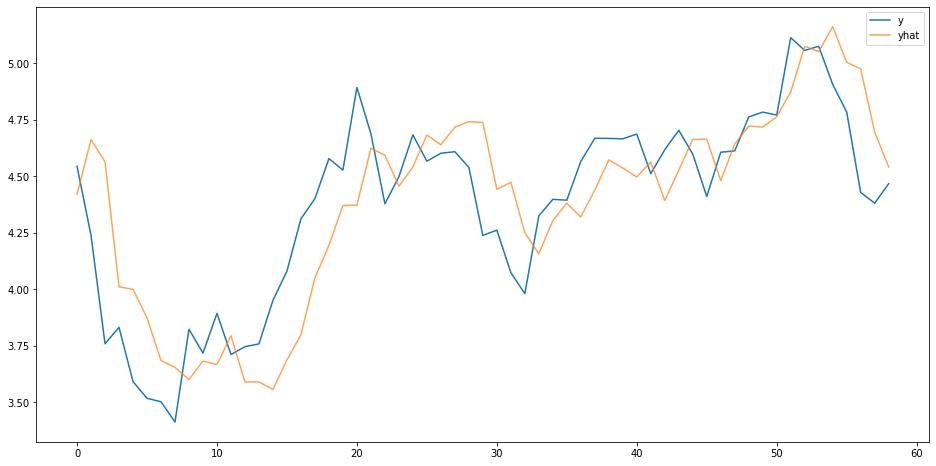

In [47]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_test, label='y')
plt.plot(yhat_svr, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [67]:
list(X)

['Volume',
 'NumberTransactions',
 'Close SP500',
 'halving',
 'Close Gold',
 'Close_eth',
 'PIB',
 'CPI',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear',
 'MA_EMA_PCA',
 'Momentum_PCA',
 'Bollinger_PCA',
 'tipoint']

In [76]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    #plt.barh(range(len(names)), imp, align='center')
    #plt.yticks(range(len(names)), names)
    #plt.show()
    #imp = imp
    return imp, names

features_names = ['Volume', 'NumberTransactions','Close SP500','halving','Close Gold','Close_eth','PIB','CPI','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','MA_EMA_PCA','Momentum_PCA','Bollinger_PCA','tipoint']
f_importances(svr_re.coef_, features_names)

((array([ 3.85249884e-03,  3.26268872e-02, -1.52225030e-03,  1.12858125e-02,
         -3.00275735e-03, -1.18532807e-02, -4.23185649e-03,  9.19182931e-04,
          7.75212032e-04,  2.58363769e-03,  1.46092014e-01, -2.19269044e-02,
         -1.59806265e-01,  1.21730179e-02,  6.71535635e-03,  8.27941842e-01,
          1.90567725e-01,  2.56863539e-03,  8.44114515e-03]),), ('Volume',))

In [77]:
imp = np.array([ 3.85249884e-03,  3.26268872e-02, -1.52225030e-03,  1.12858125e-02,
         -3.00275735e-03, -1.18532807e-02, -4.23185649e-03,  9.19182931e-04,
          7.75212032e-04,  2.58363769e-03,  1.46092014e-01, -2.19269044e-02,
         -1.59806265e-01,  1.21730179e-02,  6.71535635e-03,  8.27941842e-01,
          1.90567725e-01,  2.56863539e-03,  8.44114515e-03])

In [78]:
imp

array([ 3.85249884e-03,  3.26268872e-02, -1.52225030e-03,  1.12858125e-02,
       -3.00275735e-03, -1.18532807e-02, -4.23185649e-03,  9.19182931e-04,
        7.75212032e-04,  2.58363769e-03,  1.46092014e-01, -2.19269044e-02,
       -1.59806265e-01,  1.21730179e-02,  6.71535635e-03,  8.27941842e-01,
        1.90567725e-01,  2.56863539e-03,  8.44114515e-03])

In [79]:
imp_v = scaler.inverse_transform(imp)

In [81]:
p_imp_v = pd.DataFrame(imp_v)
p_imp_v

,0
0,8192.055774
1,8503.918095
2,8133.803215
3,8272.619448
4,8117.757197
5,8021.833533
6,8104.435986
7,8160.263935
8,8158.703551
9,8178.303614


In [83]:
variables = pd.DataFrame()
variables['nombres'] = features_names
variables

,nombres
0,Volume
1,NumberTransactions
2,Close SP500
3,halving
4,Close Gold
5,Close_eth
6,PIB
7,CPI
8,dayofweek
9,quarter


In [84]:
p_imp_v['nombres'] = variables['nombres']

In [86]:
p_imp_v.rename(columns={0: 'importance', 
                           }, inplace=True)

In [87]:
p_imp_v

,importance,nombres
0,8192.055774,Volume
1,8503.918095,NumberTransactions
2,8133.803215,Close SP500
3,8272.619448,halving
4,8117.757197,Close Gold
5,8021.833533,Close_eth
6,8104.435986,PIB
7,8160.263935,CPI
8,8158.703551,dayofweek
9,8178.303614,quarter


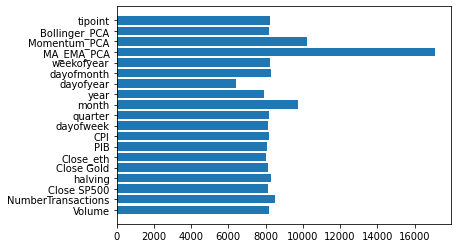

In [88]:
    plt.barh(range(len(p_imp_v['nombres'])), p_imp_v['importance'], align='center')
    plt.yticks(range(len(p_imp_v['nombres'])), p_imp_v['nombres'])
    plt.show()

In [75]:
features_names = ['Volume', 'NumberTransactions','Close SP500','halving','Close Gold','Close_eth','PIB','CPI','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','MA_EMA_PCA','Momentum_PCA','Bollinger_PCA','tipoint']

imp = svr_re
imp,features_names = zip(*sorted(zip(int(imp)),features_names))

TypeError: ignored

In [ ]:
from sklearn.externals import joblib
joblib_file = "to_pa_juanlu.pkl"
joblib.dump(svr_re, joblib_file)
#joblib_model = joblib.load(joblib_file)
#score = joblib_model.score(X_test, y_test)
#print("Test score: {0:.2f} %".format(100 * score))

['to_pa_juanlu.pkl']

In [ ]:
joblib_model = joblib.load(joblib_file)

In [ ]:
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 59.44 %


In [ ]:
para_metaregresor['svr'] = yhat_svr

#### Desestandarización

In [ ]:
des_yhat_svr = scaler.inverse_transform(yhat_svr)

In [ ]:
des_y_test = scaler.inverse_transform(y_test)

In [ ]:
rmse(des_yhat_svr,des_y_test)

6380.281330496171

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(des_y_test, des_yhat_svr)

2328.9955936303863

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(des_y_test, des_yhat_svr)
mse

8385511.746856275

In [ ]:
err = 0
y_array = des_y_test
y_val = des_yhat_svr
for i in range(0,len(y_array)-1):
  if y_array[i]> y_array[i+1]:
    if y_val[i]<y_val[i+1]:
      err+=1

  else: 
    if y_val[i]>y_val[i+1]:
      err+=1
#1-(err/len(y_array))

In [ ]:
1-(err/len(y_array))

0.44067796610169496

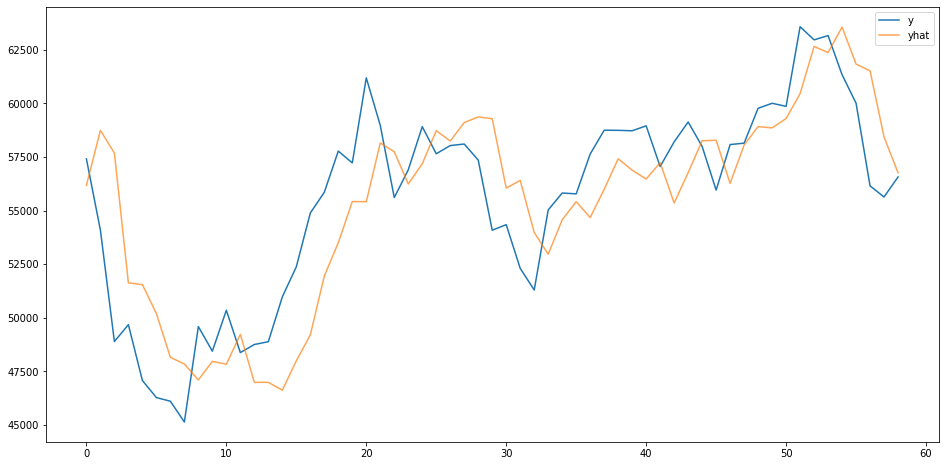

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(des_y_test, label='y')
plt.plot(des_yhat_svr, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

# Entrenamiento del metaregresor un día

## SVR

In [ ]:
meta_x = para_metaregresor

In [ ]:
y_test

array([[4.5448791 ],
       [4.23847188],
       [3.75899427],
       [3.83144178],
       [3.59132145],
       [3.51779811],
       [3.50207224],
       [3.41250287],
       [3.82321439],
       [3.71744213],
       [3.8935527 ],
       [3.71130088],
       [3.74614249],
       [3.75818232],
       [3.95097741],
       [4.08046581],
       [4.31199245],
       [4.40122228],
       [4.57851847],
       [4.52763913],
       [4.89362917],
       [4.68879056],
       [4.37848878],
       [4.49802441],
       [4.68368455],
       [4.56698518],
       [4.60221708],
       [4.60888516],
       [4.53961899],
       [4.23806406],
       [4.26183555],
       [4.07386692],
       [3.98068993],
       [4.3250103 ],
       [4.39804371],
       [4.39439827],
       [4.56581432],
       [4.66833143],
       [4.66777599],
       [4.66592051],
       [4.68710209],
       [4.51197416],
       [4.61808688],
       [4.70370818],
       [4.59863161],
       [4.41062053],
       [4.60660065],
       [4.612

In [ ]:
meta_x = meta_x.values

In [ ]:
from sklearn.svm import SVR# Bounds (define continuous variables first, then discrete!)
bounds = [
    {'name': 'C',
     'type': 'continuous',
     'domain': (1e-5, 1000)},    
     {'name': 'epsilon',
     'type': 'continuous',
     'domain': (0.5, 10)},    
     {'name': 'gamma',
     'type': 'continuous',
     'domain': (1e-5, 10)}
]
 
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        SVR(kernel='linear',C = parameters[0],
            epsilon = parameters[1],
            gamma = parameters[2]), 
        X, y, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

In [ ]:
optimizer = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds,acquisition_type ='MPI',acquisition_par=0.1,exact_eval=True)
max_iter = 50*4
max_time = 60*4
optimizer.run_optimization(max_iter, max_time)
baseline = -cross_val_score(
    SVR(), X_train, y_train, scoring='neg_root_mean_squared_error'
).mean()
print(baseline)
# 70.44352670586173print(optimizer.X[np.argmin(optimizer.Y)])
# [126.64337652   8.49323372   8.59189135]print('RMSE:', np.min(optimizer.Y),
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)
# RMSE: 54.02576574389976 Gain: 130.38876124364006     best_epsilon = optimizer.X[np.argmin(optimizer.Y)][1] 
optimizer.plot_convergence()





In [ ]:
optimizer.X[np.argmin(optimizer.Y)]

array([3.43983766e+00, 1.00000000e-05, 3.32456400e+00])

In [ ]:
svr_re = SVR(kernel='linear',C = 7,
    epsilon = 0.05,
    gamma = 7)

In [ ]:
svr_re.fit(X_train, y_train)

SVR(C=7, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=7,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
yhat_svr = svr_re.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat_svr)
mse

0.07138647868986168

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, yhat_svr)

0.21488785013912554

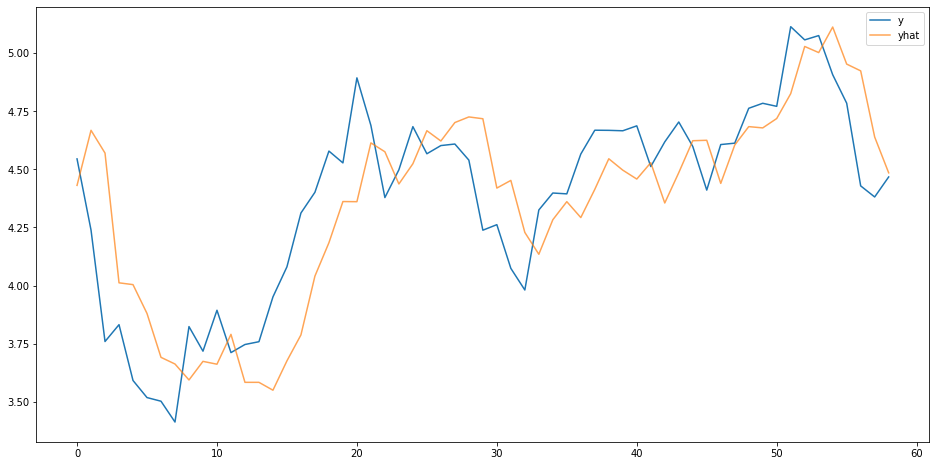

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_test, label='y')
plt.plot(yhat_svr, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
para_metaregresor['svr'] = yhat_svr

## Entrenamiento del metaregresor

# Stack Machine learning models

In [ ]:
import xgboost as xgb 
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
stregr_1 = StackingRegressor(regressors=[svr_re, boost, gp], 
                           meta_regressor=svr_re)

In [ ]:
# Entrenamos el modelo
stregr_1.fit(X_train, y_train)


[17:30:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=SVR(C=7, cache_size=200, coef0=0.0, degree=3,
                                     epsilon=0.05, gamma=7, kernel='linear',
                                     max_iter=-1, shrinking=True, tol=0.001,
                                     verbose=False),
                  refit=True,
                  regressors=[SVR(C=7, cache_size=200, coef0=0.0, degree=3,
                                  epsilon=0.05, gamma=7, kernel='linear',
                                  max_iter=-1, shrinking=True, tol=0.001,
                                  verbose=False),
                              XGBRegressor(base_score=0.5, boos...
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                              GaussianProcessRegressor(al

In [ ]:
yhat = stregr_1.predict(X_test)

In [ ]:
yhat

array([4.00600443, 3.34982875, 2.57285014, 3.0109672 , 2.52030495,
       2.33103715, 2.51544245, 2.50111794, 2.69064933, 2.9512173 ,
       2.77752595, 2.62199395, 2.68264818, 2.90284693, 2.85003358,
       3.55433799, 3.80434675, 3.49341855, 3.5345402 , 3.22496757,
       3.59074758, 3.19456761, 3.29331563, 3.61464532, 3.66315559,
       3.52363405, 3.57162992, 3.39748534, 3.31800842, 2.82676894,
       2.85511884, 2.71235149, 2.87511359, 2.96476805, 2.82645053,
       2.74051484, 2.87790235, 2.75721456, 3.14914568, 3.12656965,
       3.32836564, 2.98042938, 2.85599898, 3.40844868, 3.47613379,
       3.3997075 , 3.53937871, 3.40021802, 3.5435935 , 3.29641911,
       3.43798147, 4.00977946, 4.03913007, 3.92582072, 4.03440612,
       3.96436528, 2.95811001, 3.51283433, 3.38300132])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat)
mse

1.4374032718613639

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, yhat)

1.1629038223429604

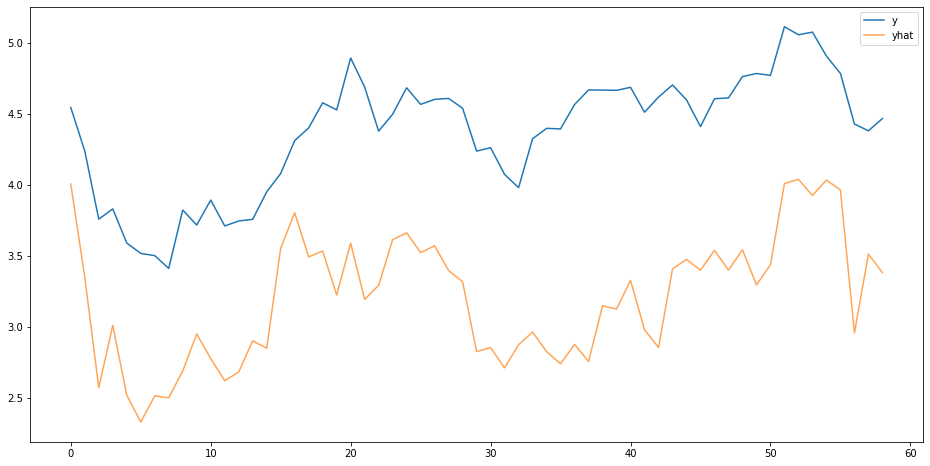

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_test, label='y')
plt.plot(yhat, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

# Stack Machine learning models

In [ ]:
import xgboost as xgb 
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')
xgbr = xgb.XGBRegressor()

In [ ]:
stregr = StackingRegressor(regressors=[svr_lin, lr, ridge,svr_rbf], 
                           meta_regressor=xgbr)

In [ ]:
# Entrenamos el modelo
stregr.fit(X_train, y_train)


[18:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              importance_type='gain',
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=100, n_jobs=1,
                                              nthread=None,
                                              objective='reg:linear',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, sc...
                                               n_jobs=None, normalize=False

In [ ]:
yhat = stregr.predict(X_test)

In [ ]:
yhat

array([4.2963185, 4.2963185, 3.4642768, 4.0224733, 4.0224733, 3.7442532,
       2.6673844, 2.6673844, 2.6673844, 2.6673844, 2.9574175, 3.6627436,
       2.6673844, 2.6673844, 2.5707786, 2.9089084, 3.7442532, 4.105916 ,
       4.074563 , 4.2684517, 4.2963185, 4.2963185, 4.2963185, 4.2963185,
       4.2963185, 4.35645  , 4.2963185, 4.2963185, 4.2963185, 4.2963185,
       3.6339042, 4.2963185, 3.259424 , 3.0179617, 3.2181275, 3.195574 ,
       2.9678116, 3.195574 , 3.6339042, 2.948934 , 2.9678116, 2.9678116,
       2.505769 , 2.9678116, 3.195574 , 3.6339042, 2.948934 , 3.415198 ,
       3.6339042, 3.195574 , 3.195574 , 3.4642768, 4.2963185, 3.6339042,
       4.2963185, 3.4642768, 2.505769 , 2.5724688, 2.505769 ],
      dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat)
mse

1.1993895172188753

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, yhat)

0.9212499400372414

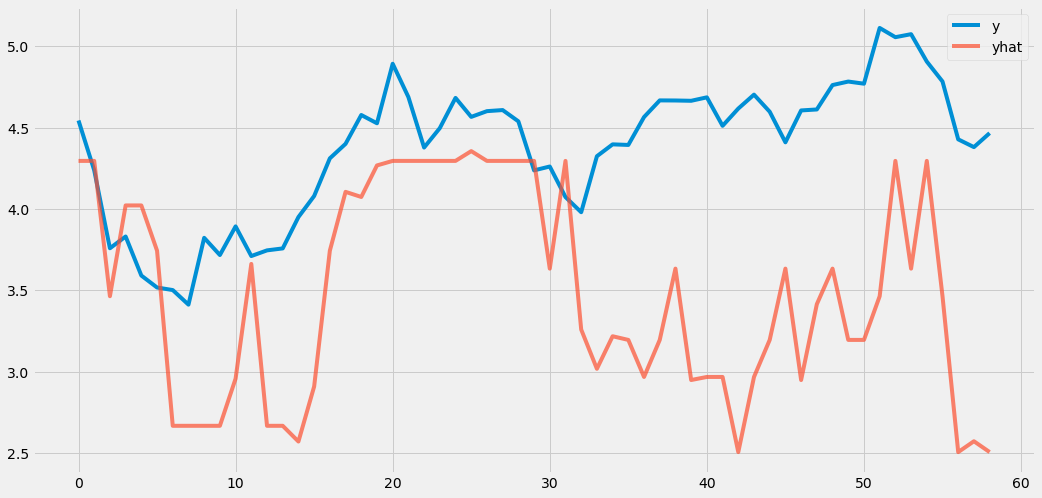

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_test, label='y')
plt.plot(yhat, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

# Predicciones a 5 días

In [ ]:
X_p = pd.DataFrame(x)
y_p = pd.DataFrame(y)

In [ ]:
X_5 = X_p.iloc[:-5].reset_index()
y_5 = y_p[5:].reset_index()

In [ ]:
X_5_train = x[:1900]
y_5_train = y[:1900]
X_5_test = x[1900:]
y_5_test = y[1900:]

## SVR

In [ ]:
from sklearn.svm import SVR# Bounds (define continuous variables first, then discrete!)
bounds = [
    {'name': 'C',
     'type': 'continuous',
     'domain': (1e-5, 1000)},    
     {'name': 'epsilon',
     'type': 'continuous',
     'domain': (0.5, 10)},    
     {'name': 'gamma',
     'type': 'continuous',
     'domain': (1e-5, 10)}
]
 
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        SVR(kernel='linear',C = parameters[0],
            epsilon = parameters[1],
            gamma = parameters[2]), 
        X_5_train, y_5_train, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

0.24598681528358152
RMSE: 0.3282102444612848 Gain: 74.9479394487937


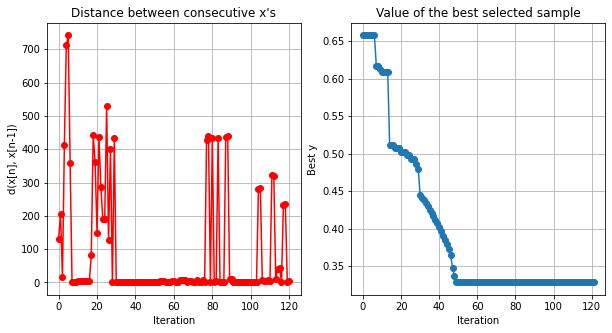

In [ ]:

optimizer = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds,acquisition_type ='MPI',acquisition_par=0.1,exact_eval=True)
max_iter = 50*4
max_time = 60*4
optimizer.run_optimization(max_iter, max_time)
baseline = -cross_val_score(
    SVR(), X_5_train, y_5_train, scoring='neg_root_mean_squared_error'
).mean()
print(baseline)
# 70.44352670586173print(optimizer.X[np.argmin(optimizer.Y)])
# [126.64337652   8.49323372   8.59189135]print('RMSE:', np.min(optimizer.Y),
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)
# RMSE: 54.02576574389976 Gain: 130.38876124364006     best_epsilon = optimizer.X[np.argmin(optimizer.Y)][1] 
optimizer.plot_convergence()





In [ ]:
optimizer.X[np.argmin(optimizer.Y)]

array([8.60556461e+02, 5.00000000e-01, 6.60022819e+00])

In [ ]:
svr_re_5 = SVR(kernel='linear',C = 86.05564,
    epsilon = 0.5,
    gamma = 6.6)

In [ ]:
svr_re_5.fit(X_train, y_train)

SVR(C=86.05564, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma=6.6,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
yhat_svr_5 = svr_re_5.predict(X_5_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_5_test, yhat_svr_5)
mse

0.3864288320407511

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_5_test, yhat_svr_5)

0.4749138184565707

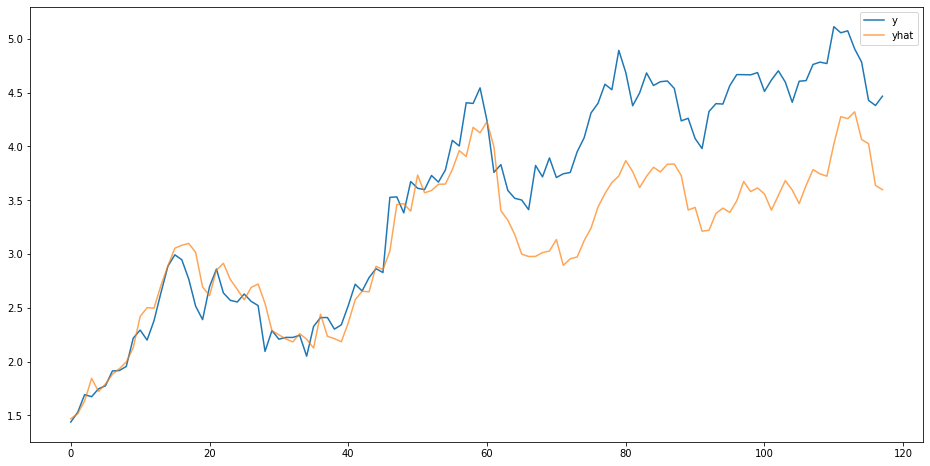

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_5_test, label='y')
plt.plot(yhat_svr_5, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.externals import joblib
joblib_file = "svr_5_dias.pkl"
joblib.dump(svr_re, joblib_file)
joblib_model = joblib.load(joblib_file)
score = joblib_model.score(X_5_test, y_5_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 94.61 %


#### Desestandarización

In [ ]:
des_5_yhat_svr = scaler.inverse_transform(yhat_svr_5)

In [ ]:
des_y_test = scaler.inverse_transform(y_5_test)

In [ ]:
rmse(des_5_yhat_svr,des_y_test)

14071.525273404688

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(des_y_test, des_5_yhat_svr)

5147.206739810679

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(des_y_test, des_5_yhat_svr)
mse

45392398.81097918

In [ ]:
err = 0
y_array = des_y_test
y_val = des_5_yhat_svr
for i in range(0,len(y_array)-1):
  if y_array[i]> y_array[i+1]:
    if y_val[i]<y_val[i+1]:
      err+=1

  else: 
    if y_val[i]>y_val[i+1]:
      err+=1
#1-(err/len(y_array))

In [ ]:
1-(err/len(y_array))

0.576271186440678

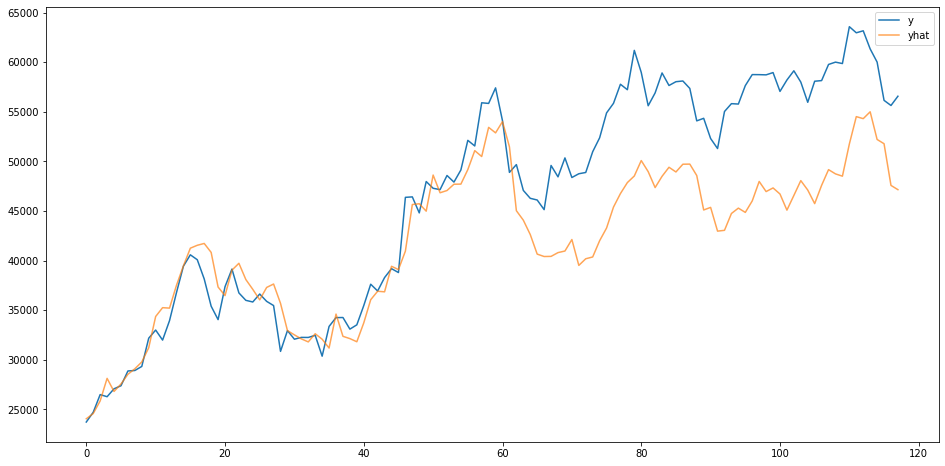

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(des_y_test, label='y')
plt.plot(des_5_yhat_svr, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

# Predicciones a 10 días

In [ ]:
X_p = pd.DataFrame(x)
y_p = pd.DataFrame(y)

In [ ]:
X_10 = X_p.iloc[:-10].reset_index()
y_10 = y_p[10:].reset_index()

In [ ]:
X_10_train = x[:1900]
y_10_train = y[:1900]
X_10_test = x[1900:]
y_10_test = y[1900:]

## SVR

In [ ]:
from sklearn.svm import SVR# Bounds (define continuous variables first, then discrete!)
bounds = [
    {'name': 'C',
     'type': 'continuous',
     'domain': (1e-5, 1000)},    
     {'name': 'epsilon',
     'type': 'continuous',
     'domain': (0.5, 10)},    
     {'name': 'gamma',
     'type': 'continuous',
     'domain': (1e-5, 10)}
]
 
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        SVR(kernel='linear',C = parameters[0],
            epsilon = parameters[1],
            gamma = parameters[2]), 
        X_10_train, y_10_train, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

0.24598681528358152
RMSE: 0.3282102444612848 Gain: 74.9479394487937


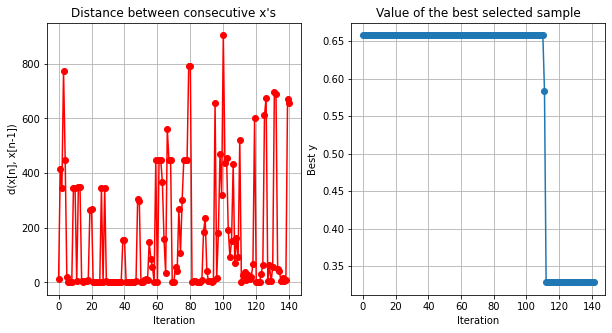

In [ ]:

optimizer = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds,acquisition_type ='MPI',acquisition_par=0.1,exact_eval=True)
max_iter = 50*4
max_time = 60*4
optimizer.run_optimization(max_iter, max_time)
baseline = -cross_val_score(
    SVR(), X_10_train, y_10_train, scoring='neg_root_mean_squared_error'
).mean()
print(baseline)
# 70.44352670586173print(optimizer.X[np.argmin(optimizer.Y)])
# [126.64337652   8.49323372   8.59189135]print('RMSE:', np.min(optimizer.Y),
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)
# RMSE: 54.02576574389976 Gain: 130.38876124364006     best_epsilon = optimizer.X[np.argmin(optimizer.Y)][1] 
optimizer.plot_convergence()





In [ ]:
optimizer.X[np.argmin(optimizer.Y)]

array([8.68357633e+02, 5.00000000e-01, 7.61515537e+00])

In [ ]:
svr_re_10 = SVR(kernel='linear',C = 86.8357633,
    epsilon = 0.5,
    gamma = 7.61515537)

In [ ]:
svr_re_10.fit(X_10_train, y_10_train)

SVR(C=86.8357633, cache_size=200, coef0=0.0, degree=3, epsilon=0.5,
    gamma=7.61515537, kernel='linear', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
yhat_svr_10 = svr_re_10.predict(X_10_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_10_test, yhat_svr_10)
mse

5.309992544580475

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_10_test, yhat_svr_10)

2.142104891124709

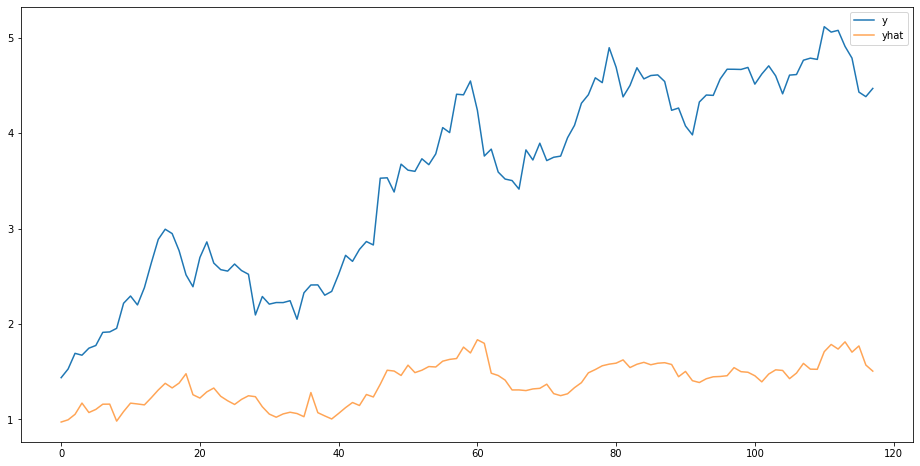

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_10_test, label='y')
plt.plot(yhat_svr_10, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.externals import joblib
joblib_file = "svr_10_dias.pkl"
joblib.dump(svr_re_10, joblib_file)
joblib_model = joblib.load(joblib_file)
score = joblib_model.score(X_10_test, y_10_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: -402.91 %


#### Desestandarización

In [ ]:
des_10_yhat_svr = scaler.inverse_transform(yhat_svr_10)

In [ ]:
des_y_test = scaler.inverse_transform(y_10_test)

In [ ]:
rmse(des_10_yhat_svr,des_y_test)

25854.365181790083

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(des_y_test, des_10_yhat_svr)

23216.54225352215

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(des_y_test, des_10_yhat_svr)
mse

623745640.2877948

In [ ]:
err = 0
y_array = des_y_test
y_val = des_10_yhat_svr
for i in range(0,len(y_array)-1):
  if y_array[i]> y_array[i+1]:
    if y_val[i]<y_val[i+1]:
      err+=1

  else: 
    if y_val[i]>y_val[i+1]:
      err+=1
#1-(err/len(y_array))

In [ ]:
1-(err/len(y_array))

0.5254237288135593

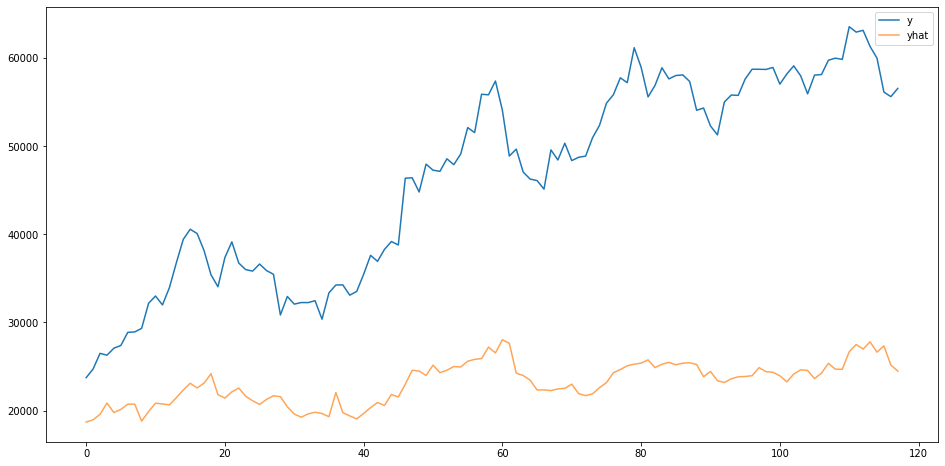

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(des_y_test, label='y')
plt.plot(des_10_yhat_svr, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

# Gaussian Regressor

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel as C
from pylab import figure

In [ ]:
#kernel = C(1.0, (0.1, 10.0)) * RBF([0.1], (1e-2, 1e2))
kernel = C(1.0, (0.1, 10.0)) + RBF([0.9], (1e-2, 1e2))

In [ ]:
gp_10 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

In [ ]:
gaussian_regrassor = gp_10.fit(X_10_train,y_10_train)

In [ ]:
yhat_10 = gaussian_regrassor.predict(X_10_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_10_test, yhat_10)
mse

14.078555889709811

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_10_test, yhat_10)

3.532025055309568

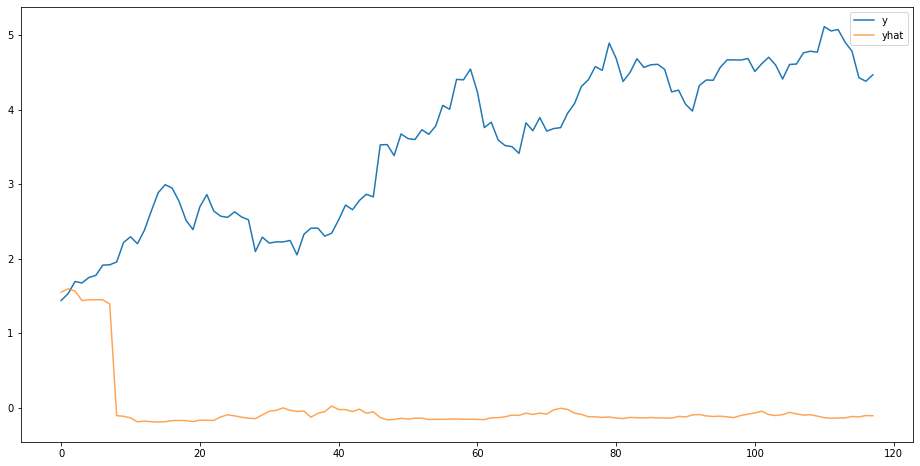

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_10_test, label='y')
plt.plot(yhat_10, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
def rmse(predictions, targets): 

  return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
rmse(yhat3,y_test)

1.2617873978024075

# SVR 

# Segunda prueba

In [ ]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
lasso = Lasso(random_state=1)
svr_rbf = SVR(kernel='rbf')
regressors = [svr_lin, lr, ridge, lasso]
stregr = StackingRegressor(regressors=regressors, 
                           meta_regressor=svr_rbf)

In [ ]:
params = {'lasso__alpha': [0.1, 1.0, 10.0],
          'ridge__alpha': [0.1, 1.0, 10.0],
          'svr__C': [0.1, 1.0, 10.0],
          'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          'meta_regressor__gamma': [0.1, 1.0, 10.0]}

In [ ]:
grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    refit=True)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingRegressor(meta_regressor=SVR(C=1.0,
                                                            cache_size=200,
                                                            coef0=0.0, degree=3,
                                                            epsilon=0.1,
                                                            gamma='scale',
                                                            kernel='rbf',
                                                            max_iter=-1,
                                                            shrinking=True,
                                                            tol=0.001,
                                                            verbose=False),
                                         refit=True,
                                         regressors=[SVR(C=1.0, cache_size=200,
                                                         coef0=0.0, degree=3,
           

In [ ]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: -628.506067 using {'lasso__alpha': 1.0, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 1.0, 'svr__C': 0.1}


In [ ]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))
    if r > 10:
        break

-628.506 +/- 626.65 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 0.1, 'svr__C': 0.1}
-628.506 +/- 626.65 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 0.1, 'svr__C': 1.0}
-628.506 +/- 626.65 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 0.1, 'svr__C': 10.0}
-628.506 +/- 626.65 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 1.0, 'svr__C': 0.1}
-628.506 +/- 626.65 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 1.0, 'svr__C': 1.0}
-628.506 +/- 626.65 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 1.0, 'svr__C': 10.0}
-628.506 +/- 626.65 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 10.0, 'svr__C': 0.1}
-628.506 +/- 626.65 {'lasso__alpha': 0.1, 'meta_regressor__

In [ ]:
print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

Best parameters: {'lasso__alpha': 1.0, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 1.0, 'svr__C': 0.1}
Accuracy: -628.51


In [ ]:
yhat2 = grid.predict(X_test)

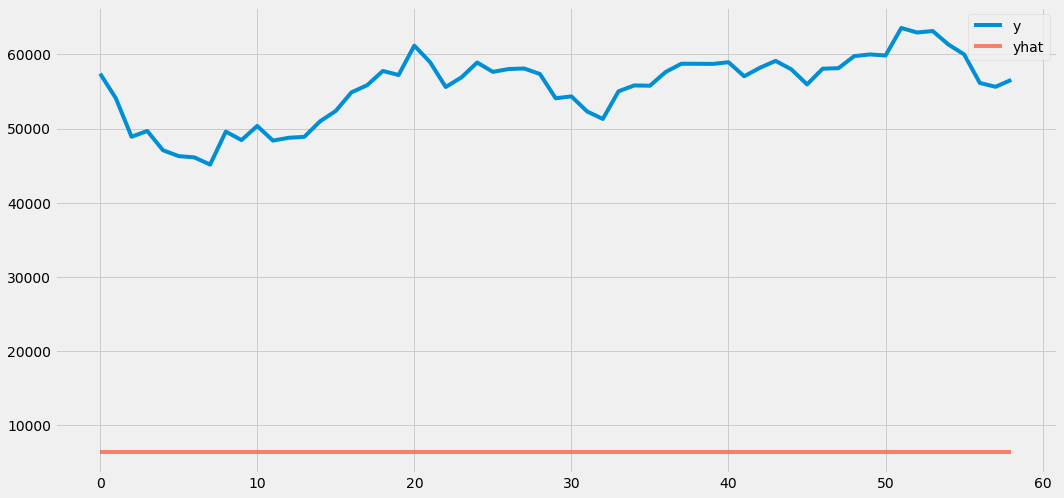

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_test, label='y')
plt.plot(yhat2, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

# Predicciones a 30 días

In [ ]:
X_p = pd.DataFrame(x)
y_p = pd.DataFrame(y)

In [ ]:
X_30 = X_p.iloc[:-30].reset_index()
y_30 = y_p[30:].reset_index()

In [ ]:
X_30_train = x[:1900]
y_30_train = y[:1900]
X_30_test = x[1900:]
y_30_test = y[1900:]

## SVR

In [ ]:
from sklearn.svm import SVR# Bounds (define continuous variables first, then discrete!)
bounds = [
    {'name': 'C',
     'type': 'continuous',
     'domain': (1e-5, 1000)},    
     {'name': 'epsilon',
     'type': 'continuous',
     'domain': (0.5, 10)},    
     {'name': 'gamma',
     'type': 'continuous',
     'domain': (1e-5, 10)}
]
 
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        SVR(kernel='linear',C = parameters[0],
            epsilon = parameters[1],
            gamma = parameters[2]), 
        X_30_train, y_30_train, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

0.24598681528358152
RMSE: 0.3282102444612848 Gain: 74.9479394487937


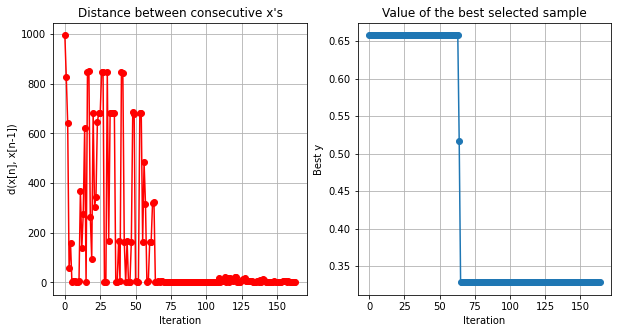

In [ ]:

optimizer = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds,acquisition_type ='MPI',acquisition_par=0.1,exact_eval=True)
max_iter = 50*4
max_time = 60*4
optimizer.run_optimization(max_iter, max_time)
baseline = -cross_val_score(
    SVR(), X_30_train, y_30_train, scoring='neg_root_mean_squared_error'
).mean()
print(baseline)
# 70.44352670586173print(optimizer.X[np.argmin(optimizer.Y)])
# [126.64337652   8.49323372   8.59189135]print('RMSE:', np.min(optimizer.Y),
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)
# RMSE: 54.02576574389976 Gain: 130.38876124364006     best_epsilon = optimizer.X[np.argmin(optimizer.Y)][1] 
optimizer.plot_convergence()





In [ ]:
optimizer.X[np.argmin(optimizer.Y)]

array([229.7297563 ,   0.5       ,   6.01378285])

In [ ]:
svr_re_30 = SVR(kernel='linear',C = 229.7297563,
    epsilon = 0.5,
    gamma = 6.01378285)

In [ ]:
svr_re_30.fit(X_30_train, y_30_train)

SVR(C=229.7297563, cache_size=200, coef0=0.0, degree=3, epsilon=0.5,
    gamma=6.01378285, kernel='linear', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
yhat_svr_30 = svr_re_30.predict(X_30_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_30_test, yhat_svr_30)
mse

5.309992544580475

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_30_test, yhat_svr_30)

2.142104891124709

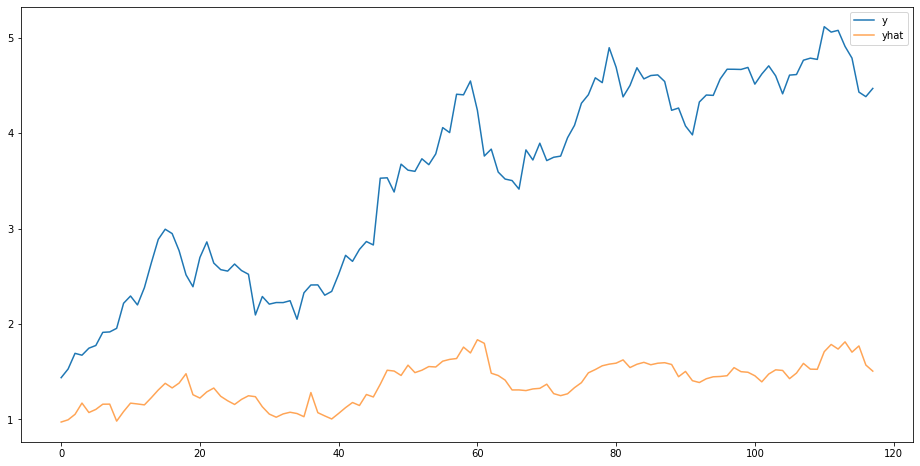

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_30_test, label='y')
plt.plot(yhat_svr_30, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.externals import joblib
joblib_file = "svr_30_dias.pkl"
joblib.dump(svr_re_30, joblib_file)
joblib_model = joblib.load(joblib_file)
score = joblib_model.score(X_30_test, y_30_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: -402.91 %


#### Desestandarización

In [ ]:
des_30_yhat_svr = scaler.inverse_transform(yhat_svr_30)

In [ ]:
des_y_test = scaler.inverse_transform(y_30_test)

In [ ]:
rmse(des_30_yhat_svr,des_y_test)

25854.365181790083

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(des_y_test, des_30_yhat_svr)

23216.54225352215

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(des_y_test, des_30_yhat_svr)
mse

623745640.2877948

In [ ]:
des_5_yhat_svr.shape

(118,)

In [ ]:
err = 0
y_array = des_y_test
y_val = des_30_yhat_svr
for i in range(0,len(y_array)-1):
  if y_array[i]> y_array[i+1]:
    if y_val[i]<y_val[i+1]:
      err+=1

  else: 
    if y_val[i]>y_val[i+1]:
      err+=1
#1-(err/len(y_array))

In [ ]:
1-(err/len(y_array))

0.5254237288135593

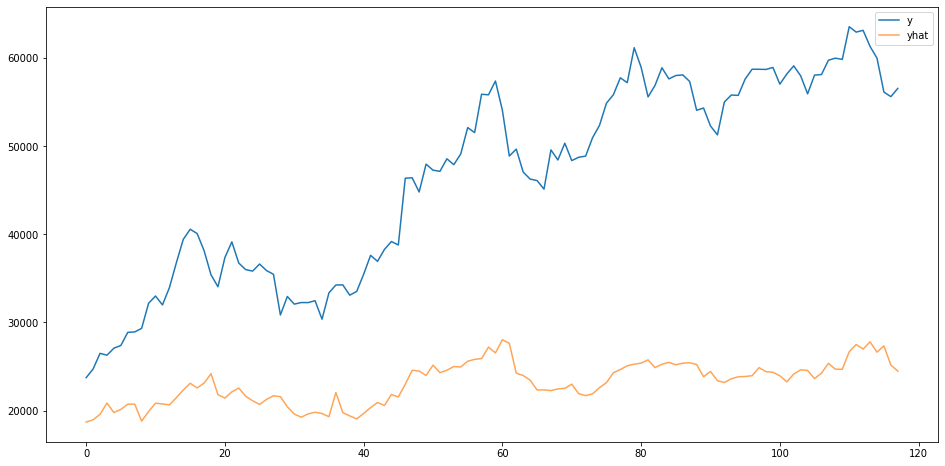

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(des_y_test, label='y')
plt.plot(des_30_yhat_svr, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

# XGBoost Gaussian processes Regression with GPy

In [ ]:
import GPy
import GPyOpt
import seaborn as sns
sigma_f, l = 1.5, 2
kernel = GPy.kern.RBF(1, sigma_f, l)

In [ ]:
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        XGBRegressor(learning_rate=parameters[0],
                     max_depth=int(parameters[2]),
                     n_estimators=int(parameters[3]),
                     gamma=int(parameters[1]),
                     min_child_weight = parameters[4]), 
        X_30_test, y_30_test, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

In [ ]:
bounds = [
    {'name': 'learning_rate',
     'type': 'continuous',
     'domain': (0, 1)},
    {'name': 'gamma',
     'type': 'continuous',
     'domain': (0, 5)},
    {'name': 'max_depth',
     'type': 'discrete',
     'domain': (1, 50)},
    {'name': 'n_estimators',
     'type': 'discrete',
     'domain': (1, 1000)},
    {'name': 'min_child_weight',
     'type': 'discrete',
     'domain': (1, 10)}
]

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:

from xgboost import XGBRegressor
baseline = -cross_val_score(
    XGBRegressor(), X_30_train, y_30_train, scoring='neg_root_mean_squared_error'
).mean()
baseline

[18:55:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.14339861426788292

[18:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

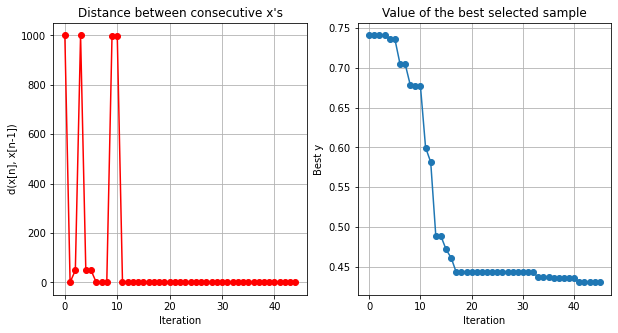

In [ ]:
optimizer = GPyOpt.methods.BayesianOptimization(
    f=f, domain=bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)
max_iter = 50
max_time = 60
optimizer.run_optimization(max_iter, max_time)
optimizer.plot_convergence()

In [ ]:
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)

RMSE: 0.430364137170415 Gain: 33.32029829685835


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_30_train, y_30_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[18:57:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
optimizer.X[np.argmin(optimizer.Y)]

array([1.94705890e-01, 3.01691886e-01, 5.00000000e+01, 1.00000000e+03,
       1.00000000e+00])

In [ ]:
boost = xgb.XGBRegressor(learning_rate=0.196343205, max_depth=50, n_estimators=1000, gamma=0.301, min_child_weight = 1)
boost.fit(X_30_train, y_30_train)

[18:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.301,
             importance_type='gain', learning_rate=0.196343205,
             max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
             n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
yhat_boost = boost.predict(X_30_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_30_test, yhat_boost)
mse

7.635107670025931

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_30_test, yhat_boost)

2.552010245573176

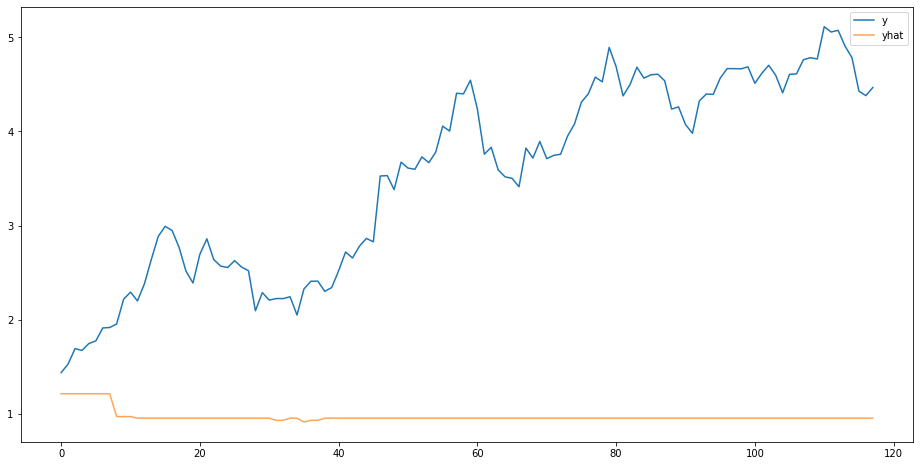

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_30_test, label='y')
plt.plot(yhat_boost, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
para_metaregresor['xgboost']=yhat_boost